# [**Clustering agglomératif avec différentes métriques**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_agglomerative_clustering_metrics.ipynb)<br/>([*Agglomerative clustering with different metrics*](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html))

Démontre l'effet de différentes métriques sur le clustering hiérarchique.

L'exemple est conçu pour montrer l'effet du choix de différentes métriques. Il est appliqué aux formes d'onde, qui peuvent être considérées comme des vecteurs de grande dimension. En effet, la différence entre les métriques est généralement plus prononcée en grande dimension (en particulier pour l'euclidienne et la cityblock).

Nous générons des données à partir de trois groupes de formes d'onde. Deux des formes d'onde (forme d'onde 1 et forme d'onde 2) sont proportionnelles l'une à l'autre. La distance cosinus est invariante à une mise à l'échelle des données, par conséquent, elle ne peut pas distinguer ces deux formes d'onde. Ainsi, même sans bruit, le regroupement utilisant cette distance ne séparera pas les formes d'onde 1 et 2.

Nous ajoutons du bruit d'observation à ces formes d'onde. Nous générons très peu de bruit : seuls 6 % des points temporels contiennent du bruit. En conséquence, la norme $\ell_1$ de ce bruit (c'est-à-dire la distance "cityblock") est beaucoup plus petite que sa norme $\ell_2$ (distance "euclidienne"). Cela se voit sur les matrices de distance inter-classes : les valeurs sur la diagonale, qui caractérisent l'étalement de la classe, sont beaucoup plus grandes pour la distance euclidienne que pour la distance cityblock.

Lorsque nous appliquons le regroupement aux données, nous constatons que le regroupement reflète ce qui se trouvait dans les matrices de distance. En effet, pour la distance euclidienne, les classes sont mal séparées à cause du bruit, et donc le clustering ne sépare pas les formes d'onde. Pour la distance cityblock, la séparation est bonne et les classes de forme d'onde sont récupérées. Enfin, la distance cosinus ne sépare pas du tout les formes d'onde 1 et 2, ainsi le regroupement les place dans le même groupe.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_metrics_001.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_metrics_002.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_metrics_003.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_metrics_004.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_metrics_005.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_metrics_006.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_metrics_007.png)


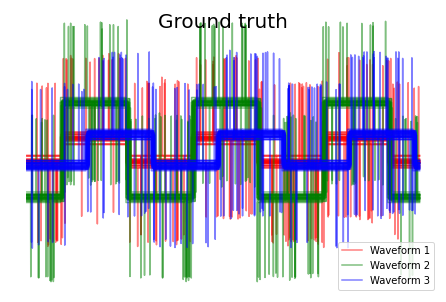

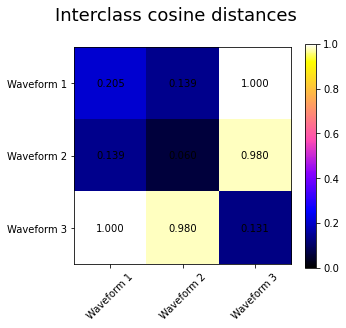

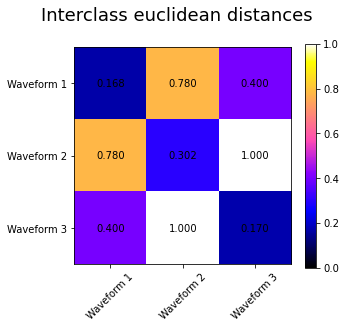

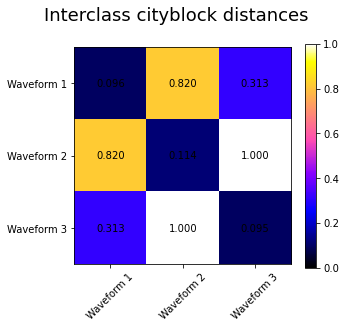

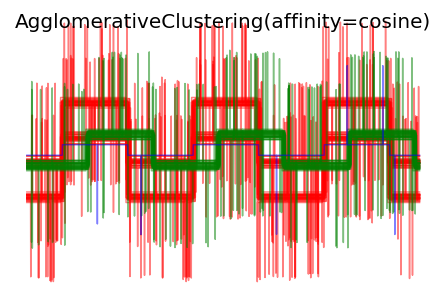

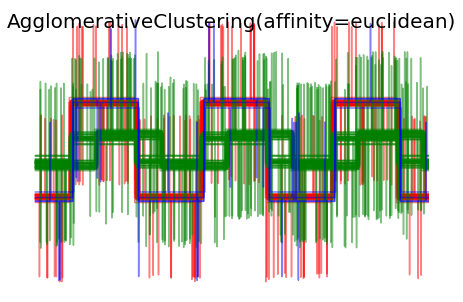

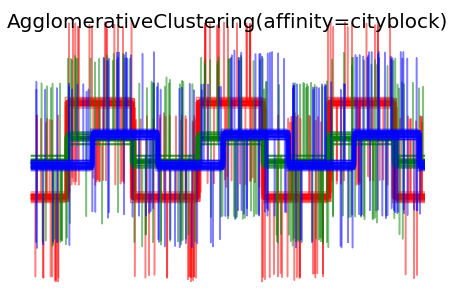

In [1]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))


X = list()
y = list()
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30):
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < 0.997] = 0

        X.append(
            12
            * (
                (a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise)))
                + additional_noise
            )
        )
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ("Waveform 1", "Waveform 2", "Waveform 3")

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c, n in zip(range(n_clusters), "rgb", labels):
    lines = plt.plot(X[y == l].T, c=c, alpha=0.5)
    lines[0].set_label(n)

plt.legend(loc="best")

plt.axis("tight")
plt.axis("off")
plt.suptitle("Ground truth", size=20)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y == i], X[y == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            plt.text(
                i,
                j,
                "%5.3f" % avg_dist[i, j],
                verticalalignment="center",
                horizontalalignment="center",
            )

    plt.imshow(avg_dist, interpolation="nearest", cmap=plt.cm.gnuplot2, vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18)
    plt.tight_layout()


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", affinity=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), "rgbk"):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()